In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [ ]:
print("No. of images in training set {}".format(mnist.train.images.shape))
print("No. of labels in training set {}".format(mnist.train.labels.shape))
print("No. of images in testing set {}".format(mnist.test.images.shape))
print("No. of labels in testing set {}".format(mnist.test.labels.shape))

In [ ]:
img1 = mnist.train.images[41].reshape(28,28)
plt.imshow(img1, cmap='Greys')

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) # none = number of samples batch size passed - dynamically changes at runtime
y = tf.placeholder(tf.float32, [None, 10]) # 10 classes to classify. 

# Artifcial Neural Network

In [ ]:
# hyper-parameters
learning_rate = 0.1
epochs = 10
batch_size = 100

In [ ]:
w_xh = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name = 'w_xh')
b_h = tf.Variable(tf.random_normal([300]), name = "b_h")

w_hy = tf.Variable(tf.random_normal([300, 10], stddev = 0.03), name = "w_hy")
b_y = tf.Variable(tf.random_normal([10]), name="b_y")

In [ ]:
# forward propagation

z1 = tf.add(tf.matmul(x, w_xh), b_h)
a1 = tf.nn.relu(z1)
z2 = tf.add(tf.matmul(a1, w_hy), b_y)
yhat = tf.nn.softmax(z2)

In [ ]:
# define cost function as cross entropy loss. 
# - also known as log loss
# log loss = - Sum yiLog(yhat)

In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=[1]))

In [ ]:
# objective is to minimize cost function
# the cost function is minimized back propagating the network backward and performing gradient descent
# tensor flows gradient descent optimiser does this...

optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yhat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# RUN tensorflow

In [ ]:
init_op = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimiser, cross_entropy], 
                            feed_dict = {x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost=""{:.3f}".format(avg_cost))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y:mnist.test.labels}))

# Convolutional Neural Network
- LOAD DATA

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data/fashion/', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [6]:
print("No. of images in training set {}".format(fashion_mnist.train.images.shape))
print("No. of labels in training set {}".format(fashion_mnist.train.labels.shape))
print("No. of images in testing set {}".format(fashion_mnist.test.images.shape))
print("No. of labels in testing set {}".format(fashion_mnist.test.labels.shape))

No. of images in training set (55000, 784)
No. of labels in training set (55000, 10)
No. of images in testing set (10000, 784)
No. of labels in testing set (10000, 10)


In [7]:
labels = {
    0: "T-shirt", 
    1: "Trouser", 
    2: "Pullover", 
    3: "Dress", 
    4: "Coat", 
    5: "Sandal", 
    6: "Shirt", 
    7: "Sneaker", 
    8: "Bag",
    9: "Ankle Boot"
}


In [12]:
img2 = fashion_mnist.train.images[19].reshape(28,28)
label1 = np.where(fashion_mnist.train.labels[19] == 1)[0][0]
print("y = {} ({})".format(label1, labels[label1]))

y = 0 (T-shirt)


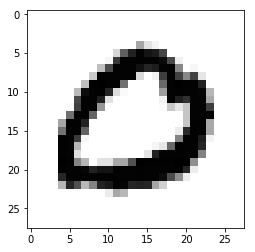

In [13]:
plt.imshow(img2, cmap="Greys")

- Construct CNN 